In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

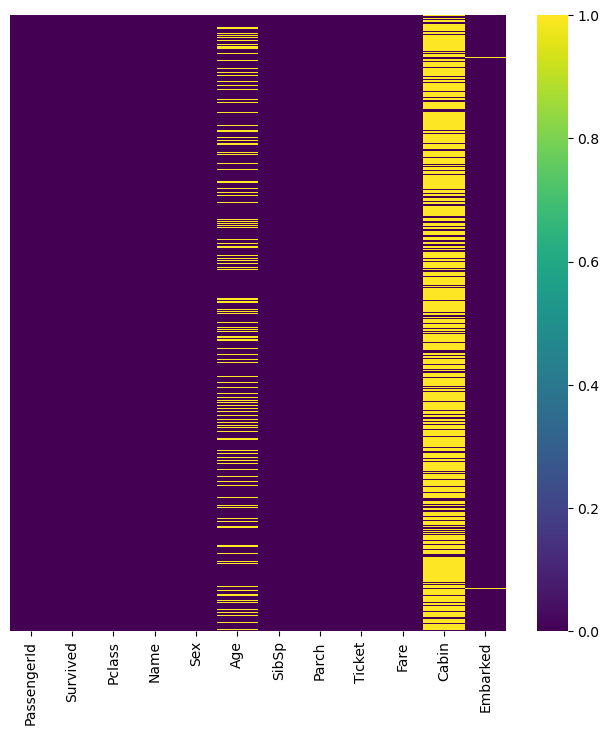

In [6]:
plt.figure(figsize= (8, 8))
sns.heatmap(train.isnull(), yticklabels= False, cmap= 'viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like it is missing too much of the data to do something useful with it. 

In [8]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

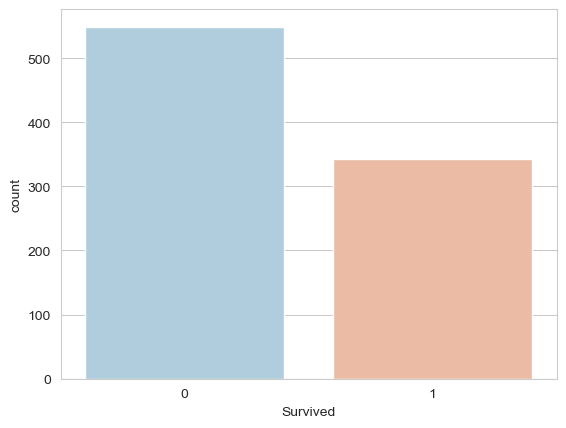

In [9]:
sns.countplot(x= 'Survived', data= train, hue= 'Survived', palette= 'RdBu_r', legend= False)

<Axes: xlabel='Survived', ylabel='count'>

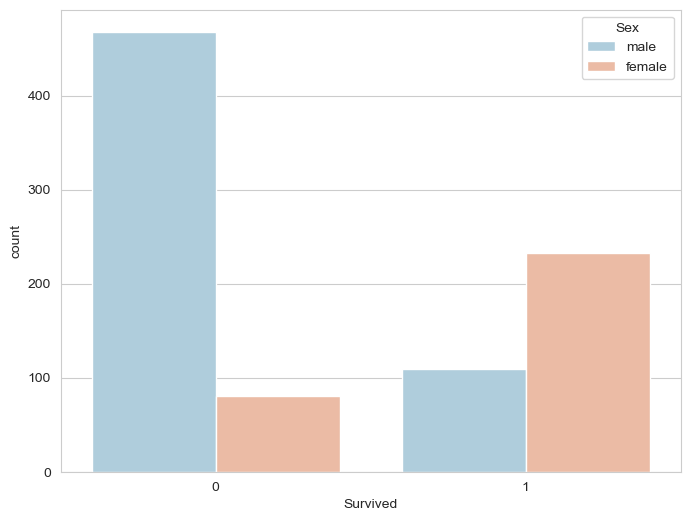

In [10]:
plt.figure(figsize= (8, 6))
sns.countplot(data= train, x= 'Survived', hue= 'Sex', palette= 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

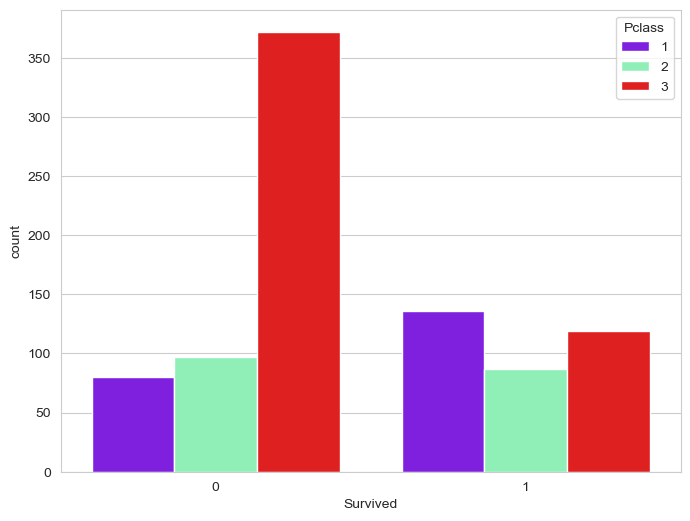

In [11]:
plt.figure(figsize= (8, 6))
sns.countplot(data= train, x= 'Survived', hue= 'Pclass', palette= 'rainbow')

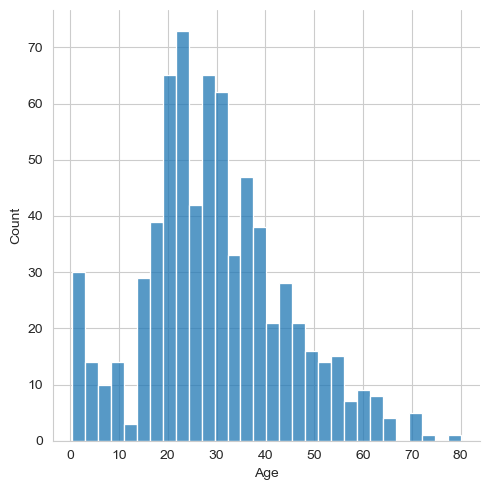

In [12]:
sns.displot(data= train['Age'].dropna(), bins= 30)

<Axes: xlabel='SibSp', ylabel='count'>

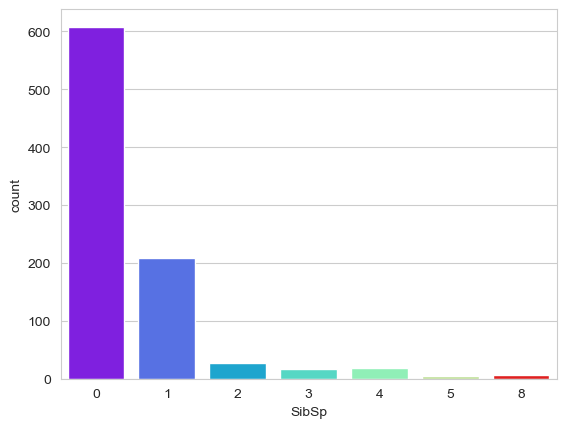

In [13]:
sns.countplot(x= 'SibSp', data= train, hue= 'SibSp', palette= 'rainbow', legend= False)

<Axes: xlabel='Fare', ylabel='Count'>

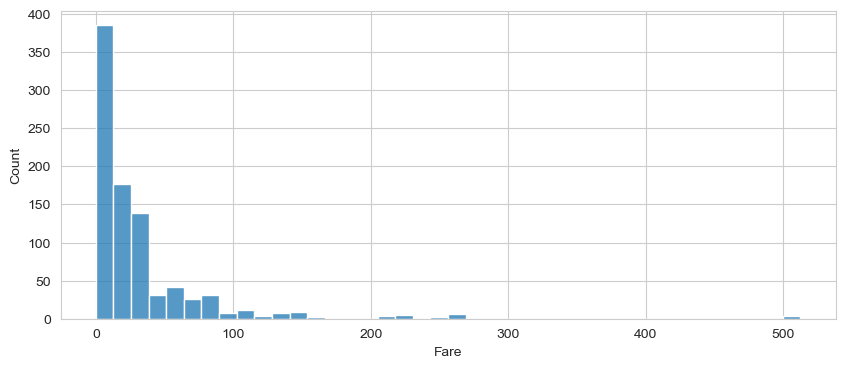

In [14]:
plt.figure(figsize= (10, 4))
sns.histplot(data= train, x= 'Fare', bins= 40)

<Axes: xlabel='Pclass', ylabel='Age'>

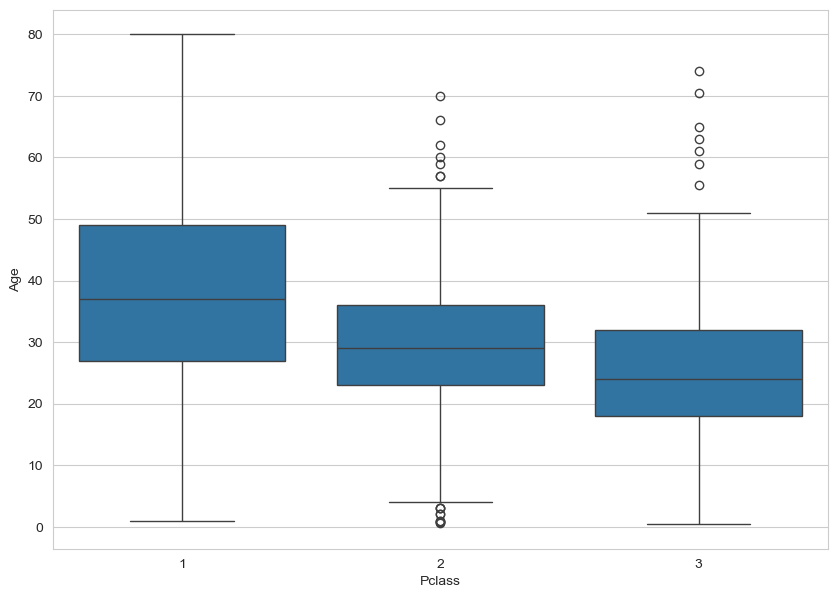

In [15]:
plt.figure(figsize= (10, 7))
sns.boxplot(x= 'Pclass', y= 'Age', data= train)

# Cleaning Data
I want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation) in each passenger class.

In [17]:
def impute_age(cols):
    Age = cols['Age']
    Pclass = cols['Pclass']
    if pd.isnull(Age):
        if Pclass == 1:
            return train[train['Pclass'] == 1]['Age'].median()
        elif Pclass == 2:
            return train[train['Pclass'] == 2]['Age'].median()
        else:
            return train[train['Pclass'] == 3]['Age'].median()
    else:
        return Age

In [18]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis= 1)

<Axes: >

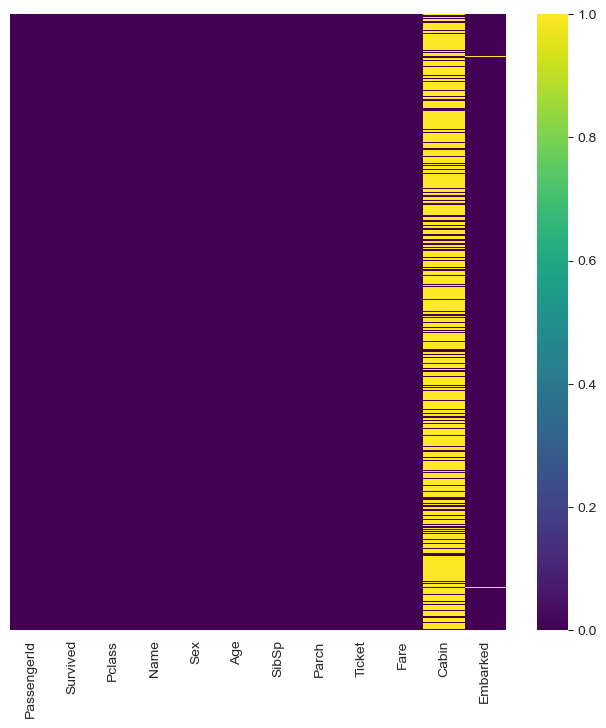

In [19]:
plt.figure(figsize= (8, 8))
sns.heatmap(train.isnull(), yticklabels= False, cmap= 'viridis')

In [20]:
train.drop('Cabin', axis= 1, inplace= True)

<Axes: >

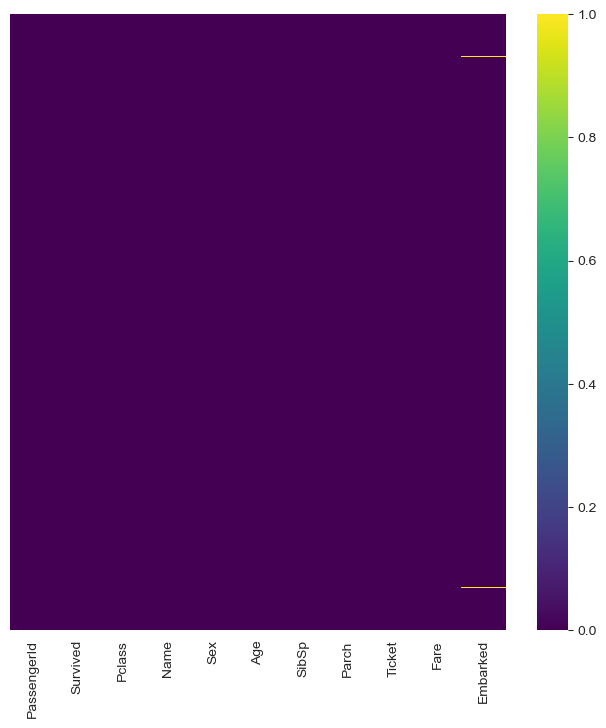

In [21]:
plt.figure(figsize= (8, 8))
sns.heatmap(train.isnull(), yticklabels= False, cmap= 'viridis')

In [22]:
train.dropna(inplace= True)

<Axes: >

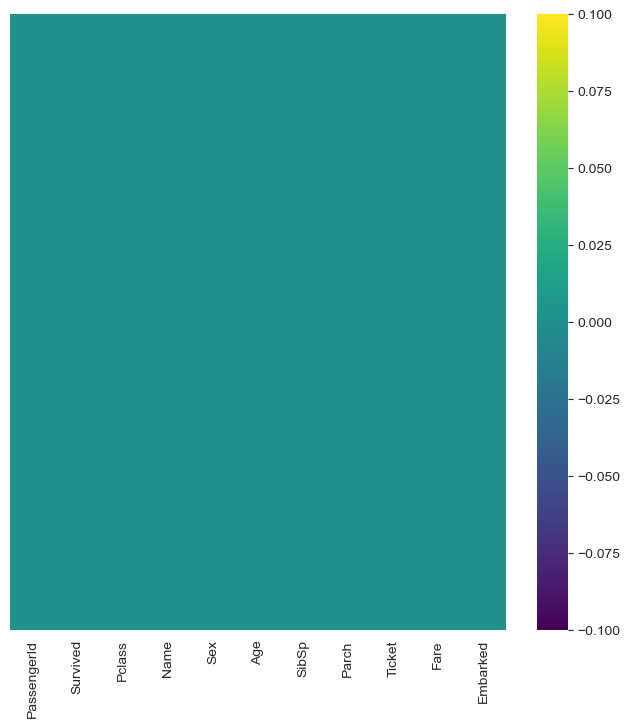

In [23]:
plt.figure(figsize= (8, 8))
sns.heatmap(train.isnull(), yticklabels= False, cmap= 'viridis')

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Converting Categorical Features for Logistic Regression Model
I need to convert categorical features to dummy variables using pandas. Otherwise, logistic regression model & random forest classifier won't be able to directly take in those features as inputs.

In [26]:
sex = pd.get_dummies(train['Sex'], drop_first= True, dtype= int)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
embark = pd.get_dummies(train['Embarked'], drop_first= True, dtype= int)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
train = pd.concat([train, sex, embark], axis= 1)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  male         889 non-null    int32  
 12  Q            889 non-null    int32  
 13  S            889 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(4)
memory usage: 93.8+ KB


In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [31]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis= 1, inplace= True)

In [32]:
train.drop('PassengerId', axis= 1, inplace= True)

In [33]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Building the Logistic Regression model
I'll start by splitting the train dataset into a training set and test set. After successfully building the model, I'll test the model on the unknown dataset, i.e., test.csv.

In [35]:
x = train.drop('Survived', axis= 1)
y = train['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 101)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression(max_iter= 300)

In [40]:
logmodel.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


In [41]:
predictions = logmodel.predict(x_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators= 100, random_state= 101)
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
rf_preds = rf.predict(x_test)
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       163
           1       0.79      0.73      0.76       104

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



In [47]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<Axes: >

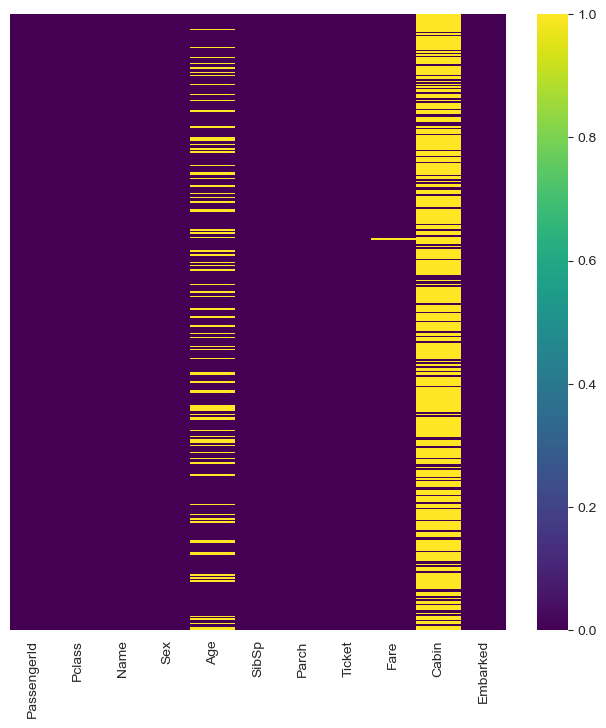

In [49]:
plt.figure(figsize= (8, 8))
sns.heatmap(test.isnull(), yticklabels= False, cmap= 'viridis')

In [50]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

In [51]:
test.drop('Cabin', axis=1, inplace=True)

In [52]:
test[test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [53]:
test[test['Pclass'] == 3]['Fare'].median()

7.8958

In [54]:
test['Fare'] = test['Fare'].fillna(test[test['Pclass'] == 3]['Fare'].median())

In [55]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [56]:
sex = pd.get_dummies(test['Sex'], drop_first=True, dtype=int)
embark = pd.get_dummies(test['Embarked'], drop_first=True, dtype=int)

In [57]:
test = pd.concat([test, sex, embark], axis=1)

In [58]:
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [59]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [60]:
passenger_ids = test['PassengerId']
test.drop('PassengerId', axis= 1, inplace= True)

In [61]:
log_final_preds = logmodel.predict(test)

In [62]:
rf_final_preds = rf.predict(test)

In [63]:
all_predictions = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived(guessed by Logistic Regression Model)': log_final_preds,
    'Survived(guessed by Random Forest Model)': rf_final_preds
})
all_predictions.head()

,PassengerId,Survived(guessed by Logistic Regression Model),Survived(guessed by Random Forest Model)
0,892,0,0
1,893,0,0
2,894,0,0
3,895,0,0
4,896,1,0


In [64]:
all_predictions.to_csv('all_predictions', index= False)